# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results,mouse_metadata, on = "Mouse ID",how = "left")

# Display the data table for preview
complete_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice.
number_of_mice = complete_data["Mouse ID"].nunique() # WOAH! forgot about how adding n makes it display better!
number_of_mice


249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupliacted = complete_data.loc[complete_data.duplicated(["Mouse ID", "Timepoint"]), 'Mouse ID'].unique()
dupliacted

array(['g989'], dtype=object)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_data[complete_data["Mouse ID"].isin(dupliacted) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
check = clean_df["Mouse ID"].nunique()
check

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: summary statistical methods = .avg?. mean?
clean_df.groupby(["Drug Regimen"])
mean_of_data = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_of_data = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
std_of_data = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
var_of_data = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
SEM_of_data = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.



assembled_data = pd.DataFrame({ "Mean Tumor Volume" : mean_of_data, "Median Tumor Volume" : median_of_data, 
                               "STD Tumor Volume" : std_of_data, "Var Tumor Volume" : var_of_data, "SEM Tumor Volume" : SEM_of_data
})

assembled_data





,Mean Tumor Volume,Median Tumor Volume,STD Tumor Volume,Var Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mean_of_data = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" : ["mean", "median", "std","var", "sem"]})
mean_of_data

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

<Axes: >

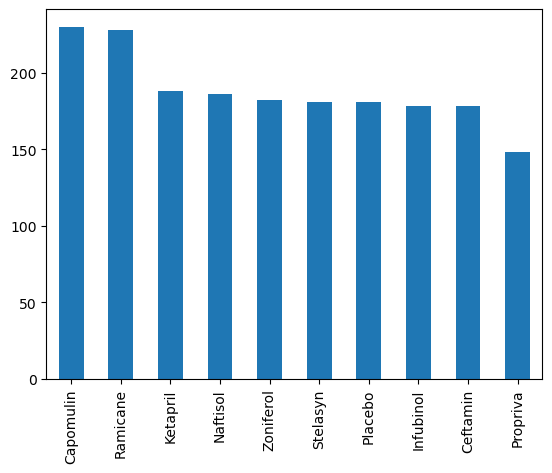

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_df["Drug Regimen"].value_counts()
counts.plot( kind="bar")

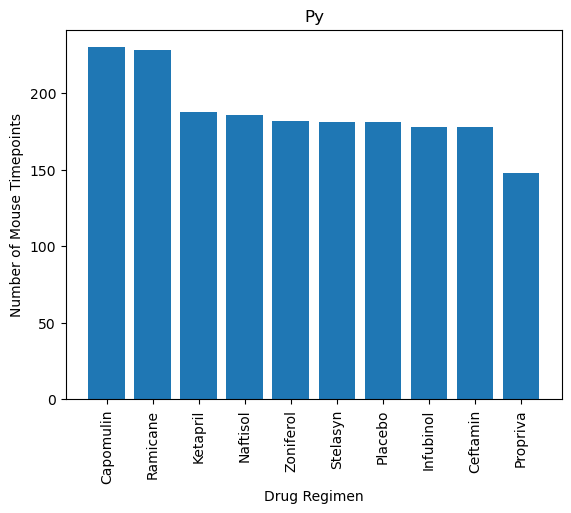

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_df["Drug Regimen"].value_counts()
plt.bar(counts.index.values, counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Timepoints")
plt.title("Py")
plt.xticks(rotation = 90)
plt.show()


<Axes: ylabel='Sex'>

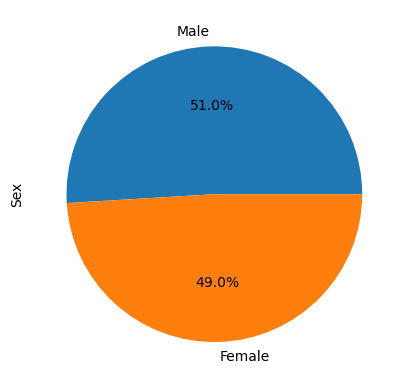

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

counts = clean_df["Sex"].value_counts()
counts.plot( kind='pie', autopct='%1.1f%%')

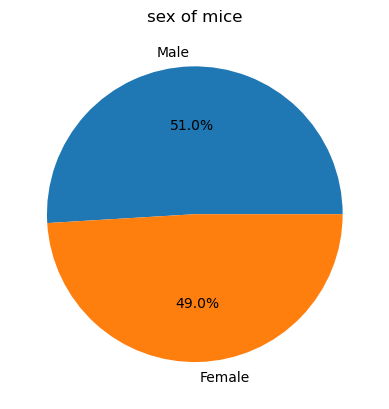

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = clean_df["Sex"].value_counts()
plt.pie(counts.values,labels=counts.index.values, autopct='%1.1f%%')
plt.title("sex of mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()
max_tumor

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


new_df = max_tumor.merge(clean_df, on = ["Mouse ID", "Timepoint"], how = "left")
new_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = new_df.loc[new_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol.append(final_tumor_vol)
    
    # quarts for lower and upper
    quartiles = final_tumor_vol.quantile([0.25,0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75] # used summarry_stats for help getting outlier outline
    iqr = upperq-lowerq

    #lower and upper bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr

    # outlier part using or conditional
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

    print(f"{treatment}:")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}\n")
    


Capomulin:
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane:
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol:
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin:
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



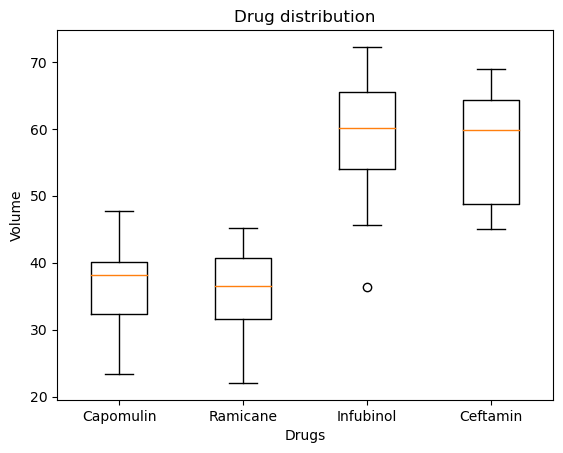

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol,labels= treatments)
plt.title("Drug distribution")
plt.xlabel("Drugs")
plt.ylabel("Volume")
plt.show()



## Line and Scatter Plots

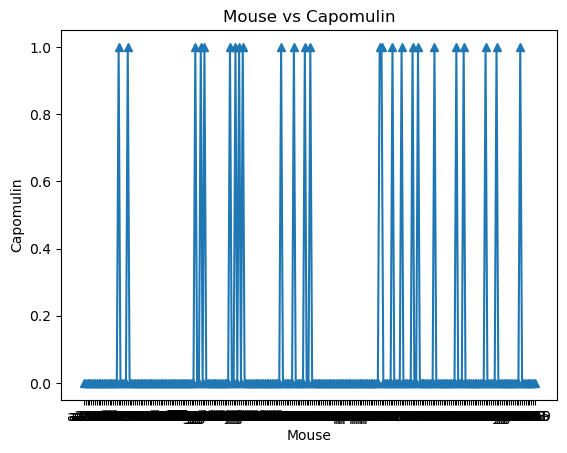

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# x_value = new_df[new_df["Mouse ID"]].iloc["a203"]
# y_value = new_df[new_df["Drug Regimen"] == ["Capomulin"]]

x_value = new_df["Mouse ID"]
y_value = new_df["Drug Regimen"] == "Capomulin"
plt.plot(x_value,y_value, marker = "^")
plt.xlabel("Mouse")
plt.ylabel("Capomulin")
plt.title("Mouse vs Capomulin")
plt.show()




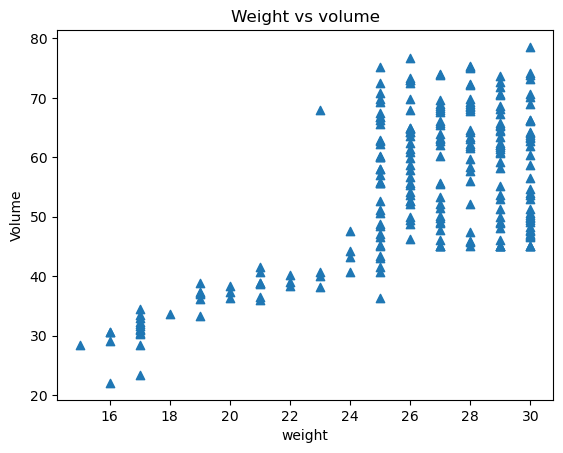

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# weight = new_df[new_df["Weight (g)"]]
# avg_vol = new_df[new_df["Tumor Volume (mm3)"]]
weight = new_df["Weight (g)"]
avg_vol = new_df["Tumor Volume (mm3)"]
plt.scatter(weight,avg_vol,marker= "^")
plt.xlabel("weight")
plt.ylabel("Volume")
plt.title("Weight vs volume")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# y = mx + b

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
# regress_values = x_values * slope + intercept 

# outline taken from regression activity from class - I know I just need to find the corresponding avlues and implement them into this formula
# after, I can print them out follwing the y = mx + b format


